**Data loading and preprocessing**

In [1]:
# Step 1: Load the data
import pandas as pd

# Load the dataset (make sure the file path is correct)
file_path = "C:/Users/leo/Downloads/Customer_Data.csv"  # Update this with the correct file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Check basic info about the dataset, including columns, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONE_OFF_PURCHASES                 8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONE_OFF_PURCHASES_FREQUENCY       8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [2]:
# Check for missing values in each column
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONE_OFF_PURCHASES                     0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONE_OFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
# Get summary statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# Check for duplicate rows
df.duplicated().sum()

0

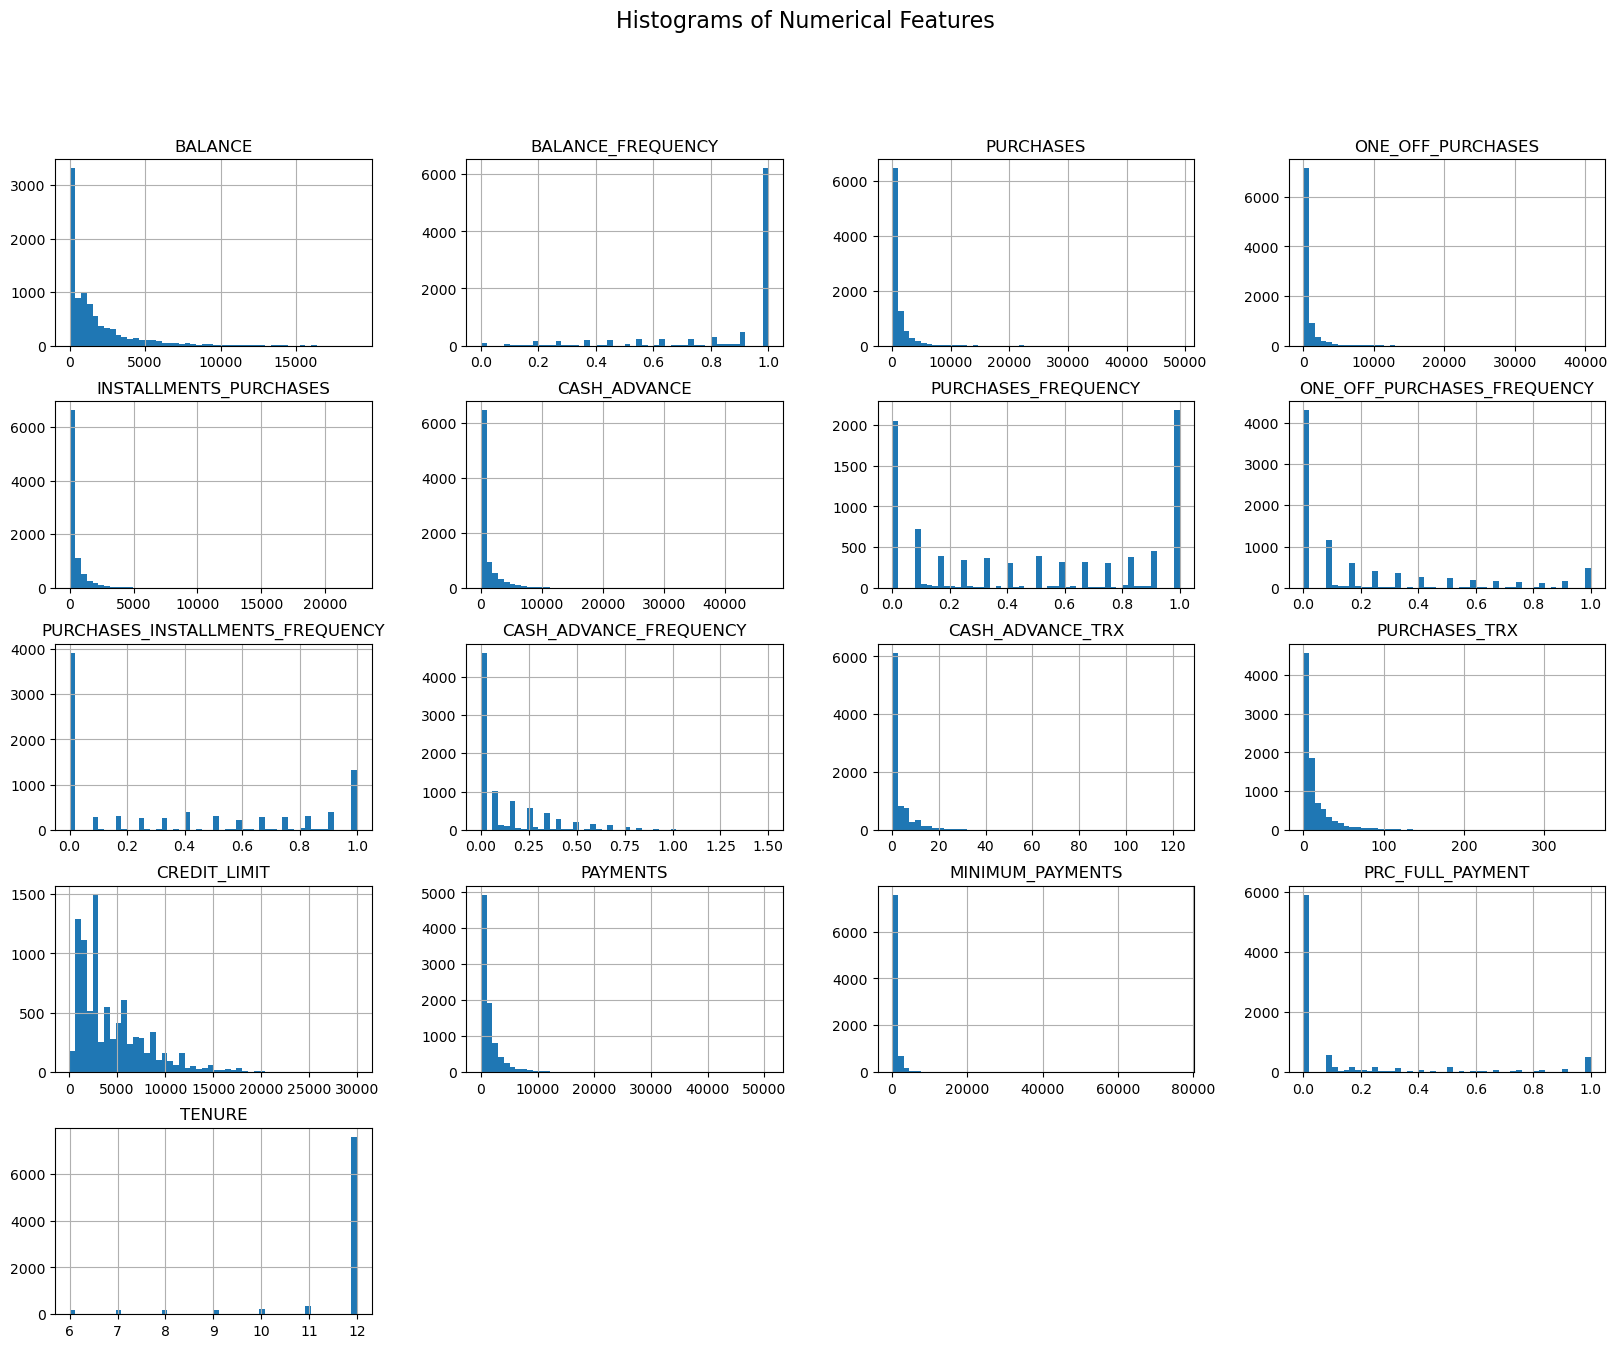

In [45]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical features
df.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

**Boxplot for Outlier Detection**

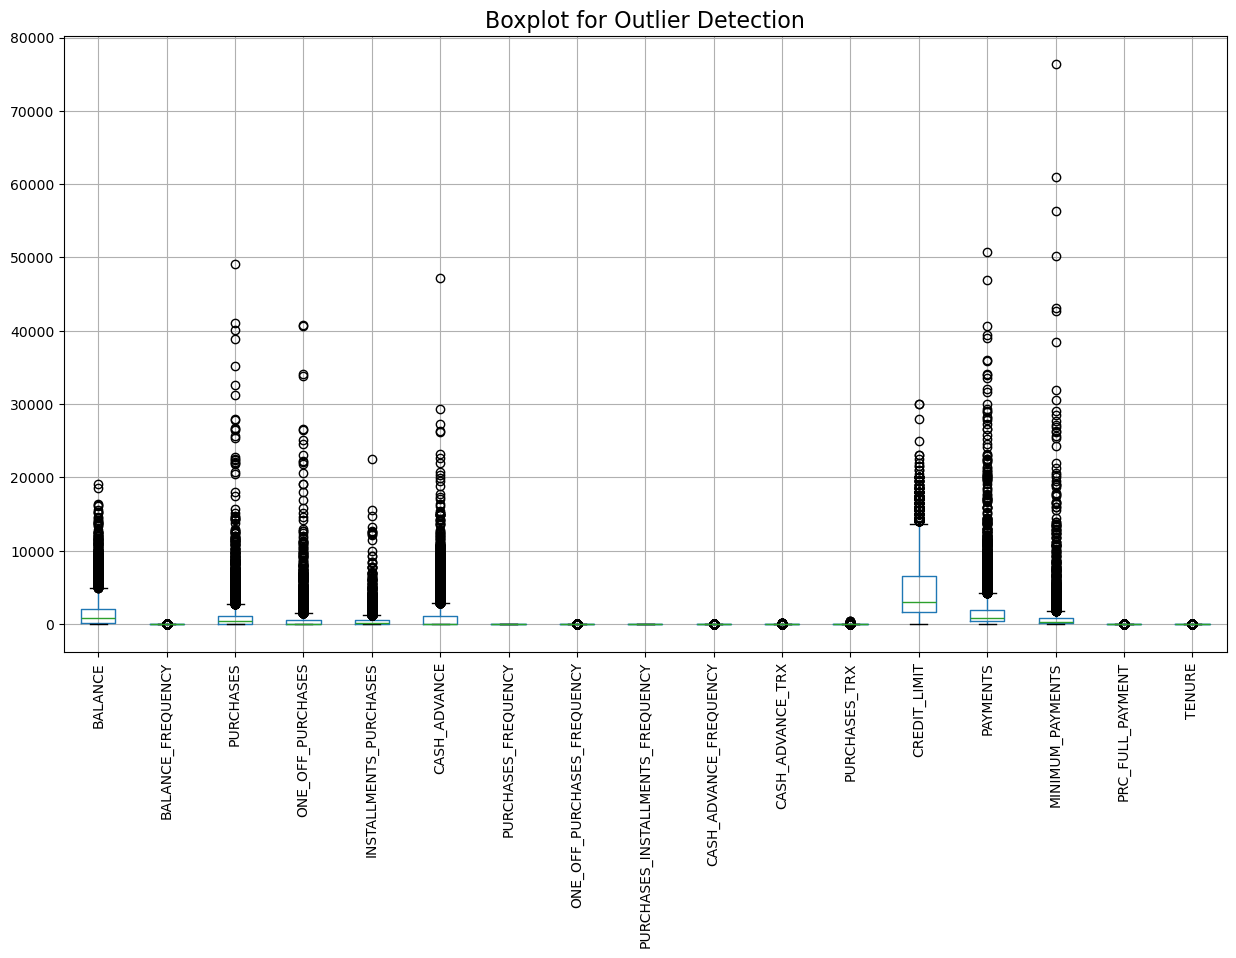

In [6]:
# Plot boxplots for all numerical features
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection', fontsize=16)
plt.show()

In [7]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the 'BALANCE' column
z_scores_balance = stats.zscore(df['BALANCE'])

# Set threshold for outliers (Z-score > 3)
threshold = 3

# Identify outliers in 'BALANCE' based on Z-score
outliers_z = np.abs(z_scores_balance) > threshold

# Number of outliers in 'BALANCE' column
print(f"Number of outliers in 'BALANCE': {np.sum(outliers_z)}")

# Show the rows with outliers in 'BALANCE'
df_outliers_z = df[outliers_z]
df_outliers_z

Number of outliers in 'BALANCE': 196


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
30,C10031,12136.219960,1.0,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.0,12
87,C10092,8181.251131,1.0,2258.01,1318.78,939.23,5251.228934,1.000000,0.750000,1.000000,0.750000,21,60,13500.0,3021.575846,2074.581541,0.0,12
90,C10095,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.0,12
120,C10125,8504.876253,1.0,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.0,12
124,C10130,14224.115410,1.0,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,C17026,9321.555794,1.0,334.90,0.00,334.90,9463.245088,1.000000,0.000000,0.916667,0.083333,5,12,10000.0,2029.431421,3506.665810,0.0,12
7132,C17325,9024.812044,1.0,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.000000,0.083333,2,0,9000.0,302.484224,61031.618600,0.0,12
7427,C17630,9220.534572,1.0,1420.31,777.66,642.65,9816.782544,1.000000,0.250000,1.000000,0.833333,29,77,12500.0,4257.372749,4696.075967,0.0,12
7764,C17975,10856.483010,1.0,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5,1,14500.0,2670.733732,2917.469357,0.0,12


In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'BALANCE'
Q1 = df['BALANCE'].quantile(0.25)
Q3 = df['BALANCE'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Identify outliers in 'BALANCE' based on IQR
outliers_iqr = (df['BALANCE'] < lower_bound) | (df['BALANCE'] > upper_bound)

# Number of outliers in 'BALANCE'
print(f"Number of outliers in 'BALANCE': {outliers_iqr.sum()}")

# Display the rows with outliers in 'BALANCE'
df_outliers_iqr = df[outliers_iqr]
df_outliers_iqr

Lower bound: -2760.5052645, Upper bound: 4942.9272155
Number of outliers in 'BALANCE': 695


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.0,12
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.0,12
24,C10025,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.0,11
28,C10029,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.0,12
30,C10031,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,C18530,6008.914524,0.777778,0.00,0.00,0.00,8304.470149,0.000000,0.000000,0.000000,0.333333,9,0,9000.0,1279.301117,1404.889491,0.0,9
8411,C18637,5934.610587,1.000000,0.00,0.00,0.00,302.678437,0.000000,0.000000,0.000000,0.250000,5,0,6000.0,1065.956065,2394.242819,0.0,12
8438,C18666,5484.339435,1.000000,0.00,0.00,0.00,5990.590134,0.000000,0.000000,0.000000,0.250000,14,0,6000.0,1229.434538,2453.164396,0.0,12
8705,C18942,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.0,12


**Standardising the Data**

In [16]:
# Select only numeric columns from the dataset
df_numeric = df.select_dtypes(include=[np.number])

# Fill missing values with the mean of each column
df_filled = df_numeric.fillna(df_numeric.mean())

# Standardise the numeric data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Convert the scaled data back into a DataFrame for easier interpretation
df_scaled = pd.DataFrame(df_scaled, columns=df_filled.columns)

# Display the first few rows of the standardised data
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


**Code for Elbow Graph:**

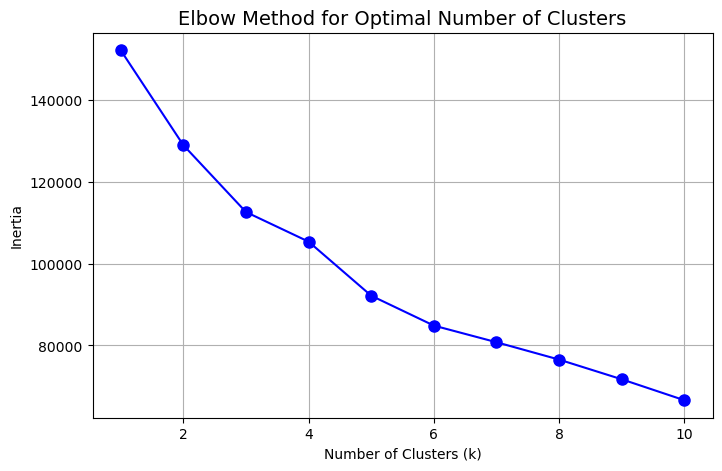

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of cluster numbers to try
range_clusters = range(1, 11)
inertias = []

# Fit K-Means for each cluster number and calculate inertia (sum of squared distances)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertias, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Applying K-Means**

In [ ]:
# Assuming the optimal number of clusters from the Elbow Graph is 4 (adjust based on your Elbow Graph)
optimal_clusters = 4

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows of the DataFrame with cluster labels
df_scaled.head()

**Visualising the Clusters:**
using Principal Component Analysis (PCA) to reduce the data to 2 dimensions for visualisation purposes and then plot the clusters.

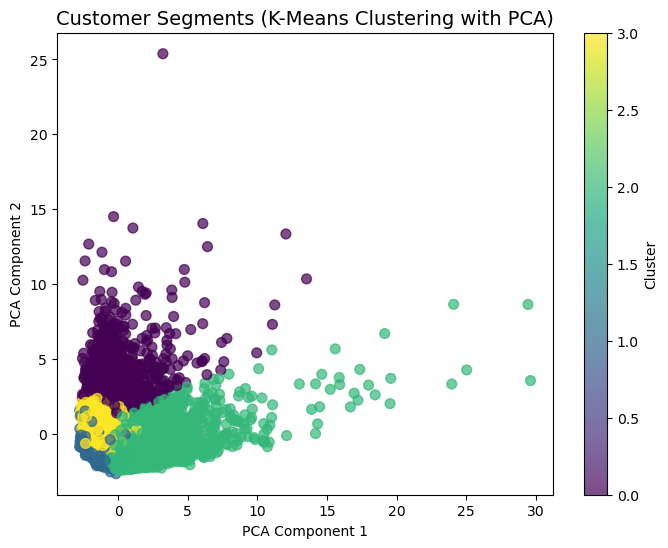

In [22]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_scaled['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Segments (K-Means Clustering with PCA)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

**Key Statistics by Cluster:**
We can calculate key statistics (like the mean) for each cluster to better understand their characteristics.

In [24]:
# Set float format to display with 2 decimal places
pd.options.display.float_format = "{:.2f}".format

# Calculate the mean values of each feature for each cluster
cluster_means = df_scaled.groupby('Cluster').mean()

# Display key statistics by cluster
print("Cluster Means:")
cluster_means

Cluster Means:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1.66,0.38,-0.13,-0.08,-0.16,1.95,-0.40,-0.14,-0.36,1.87,1.84,-0.17,1.02,0.84,0.59,-0.39,-0.08
1,-0.70,-1.96,-0.30,-0.24,-0.28,-0.32,-0.42,-0.43,-0.33,-0.50,-0.37,-0.40,-0.24,-0.24,-0.26,0.34,-0.22
2,-0.15,0.41,0.55,0.39,0.59,-0.35,1.09,0.63,0.97,-0.47,-0.36,0.72,0.17,0.14,-0.03,0.44,0.16
3,-0.03,0.38,-0.34,-0.23,-0.37,-0.09,-0.71,-0.35,-0.65,0.11,-0.04,-0.44,-0.35,-0.27,-0.02,-0.45,-0.02


**Visualise Cluster Means:**
Let’s visualise the cluster means for each feature to see how the clusters differ across all the features.

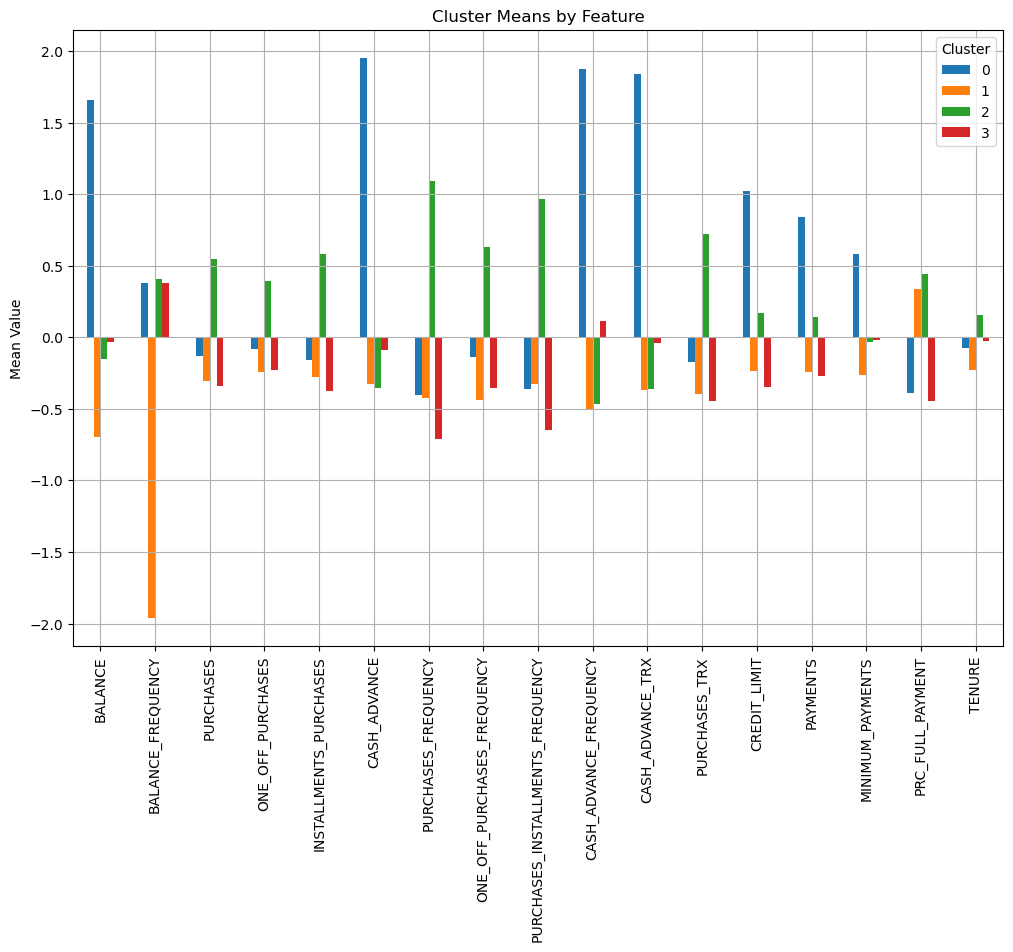

In [26]:
cluster_means.T.plot(kind='bar', figsize=(12, 8), title='Cluster Means by Feature')
plt.xticks(rotation=90)
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

# **Interpreting the Clusters:**  

In [51]:
# Display the mean values of each feature for each cluster (calculated previously)
print("Cluster Means for Interpretation:")
print(cluster_means)

Cluster Means for Interpretation:
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
Cluster                                                             
0           1.66               0.38      -0.13              -0.08   
1          -0.70              -1.96      -0.30              -0.24   
2          -0.15               0.41       0.55               0.39   
3          -0.03               0.38      -0.34              -0.23   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                         -0.16          1.95                -0.40   
1                         -0.28         -0.32                -0.42   
2                          0.59         -0.35                 1.09   
3                         -0.37         -0.09                -0.71   

         ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                 

**Interpretation of clusters**

**Cluster 0:** Low Spend, Low Balance:  
**Key Features:** Low balance, low purchases, low credit limit.  
**Description:** This cluster represents low-spending customers with modest credit limits and low balances. They are likely inactive or cautious credit users.
Strategy: Consider re-engagement campaigns (e.g., promotions, loyalty offers) to encourage more frequent use of credit cards.  

**Cluster 1:** High Spend, High Balance:  
**Key Features:** High balance, high purchases, frequent use of one-off purchases, high credit limit.  
**Description:** This segment is made up of high-spending customers who maintain higher balances and likely have high credit limits. They are regular users of credit for significant purchases.  
**Strategy:** Offer rewards or premium benefits to retain these customers. They could be targeted for loyalty programs or special credit products.    
    
**Cluster 2:** Cash-Heavy Customers:  
**Key Features:** High cash advance, low purchases, high credit limit.  
**Description:** These customers rely more on cash advances than on purchases. They might be in financial stress or prefer liquid cash for emergencies.  
**Strategy:** Offer products that provide incentives for cash advance use or introduce them to instalment-based purchases to manage cash flow.   

**Cluster 3:** Moderate Spend, Balanced Users:  
**Key Features:** Moderate balance, moderate purchases, regular instalment purchases, average credit limit.  
**Description:** This group is made up of customers with balanced spending habits. They make moderate use of credit cards and maintain reasonable balances.  
**Strategy:** Focus on providing personalised offers, such as balance transfer options or low-interest instalment plans, to maintain their engagement.  